In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!gdown --id 13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu

Downloading...
From: https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu
To: /content/inno_stats.tar.gz
1.91GB [00:11, 164MB/s]


In [3]:
!tar -xvf inno_stats.tar.gz

09_groups.csv
10_groups.csv
11_groups.csv
product_groups.csv


In [4]:
df = pd.read_csv("09_groups.csv")

# Hypothesis is that sum of goods in card is the same independently on whether there are duscounted goods.

In [6]:
bad_df = pd.read_csv("bad_ids.csv")

In [7]:
df = df[~df['id_card'].isin(set(bad_df['id_card']))]

In [11]:
green_docs =set(df[df['is_green'] == 1]['id_doc'])
len(green_docs)

1064042

In [12]:
green = df[df['id_doc'].isin(green_docs)].groupby('id_doc').sum()['sum']

In [13]:
usual =  df[~df['id_doc'].isin(green_docs)].groupby('id_doc').sum()['sum']

In [14]:
green_std = np.std(green)
usual_std = np.std(usual)
from scipy import stats
_, pval = stats.ttest_ind(usual, green, equal_var=False)

In [15]:
pval

0.0

In [16]:
del green
del usual

P value is zero so we reject the null hypothesis and discounted goods depend on sum.

# Plot sum of the cards over days

In [17]:
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')

In [18]:
sum_of_spendings = df.groupby(by=[df.index.day])['id_doc'].sum()

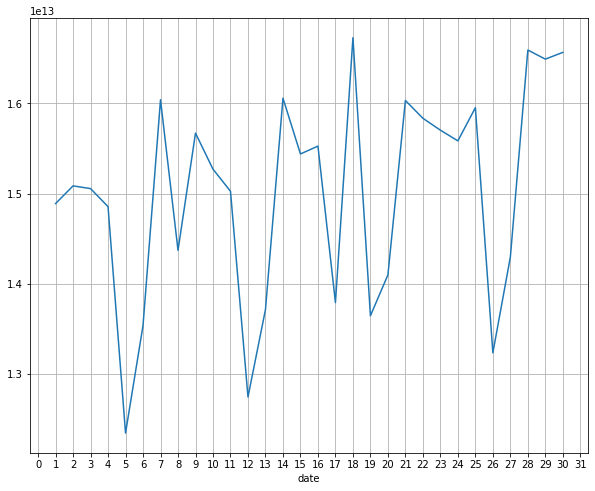

In [19]:

plt.figure(figsize=(10,8))
plt.locator_params(axis="x", nbins=50)
sum_of_spendings.plot()
plt.grid()

The graph fluctuates all over the month there is no tendnecy over 1-6, 20-26 days of the month.

# Task 3 Frequent buyers

In [25]:
frequent = df.groupby('id_card').count()
frequent.sort_values('id_doc',ascending=False)['id_doc'][:20]

id_card
1243870    707
1137696    640
5959       620
230546     559
784759     548
542043     543
710070     530
1024720    515
1071249    514
307111     511
1027635    510
137172     509
1089158    508
378148     508
1155342    501
1268011    501
1071808    497
854789     497
229676     495
799152     494
Name: id_doc, dtype: int64